In [12]:
import sys
sys.path.append('../modules')

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sequential import Sequential
from lineaire_1 import Linear
from loss import MSELoss

In [50]:
# Génération des données
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Génère 100 points aléatoires entre 0 et 10
y = 3 * X + 2 + np.random.randn(100, 1)  # y = 3x + 2 avec un peu de bruit

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des formes
print(f"X_train shape: {X_train.shape}")  # Devrait être (80, 1)
print(f"y_train shape: {y_train.shape}")  # Devrait être (80, 1)
print(f"X_test shape: {X_test.shape}")    # Devrait être (20, 1)
print(f"y_test shape: {y_test.shape}")    # Devrait être (20, 1)

X_train shape: (80, 1)
y_train shape: (80, 1)
X_test shape: (20, 1)
y_test shape: (20, 1)
Epoch 10/100, Loss: inf
Epoch 20/100, Loss: nan
Epoch 30/100, Loss: nan
Epoch 40/100, Loss: nan
Epoch 50/100, Loss: nan
Epoch 60/100, Loss: nan
Epoch 70/100, Loss: nan
Epoch 80/100, Loss: nan
Epoch 90/100, Loss: nan
Epoch 100/100, Loss: nan


In [53]:
# Définition du réseau de régression linéaire
net = Sequential(
    Linear(1, 1)  # La dimension d'entrée et de sortie est 1
)

# Définition de la fonction de perte
loss = MSELoss()

# Entraînement du réseau
epochs = 100
learning_rate = 1e-3
losses = []

for epoch in range(epochs):
    yhat = net.forward(X_train)
    cost = loss.forward(y_train, yhat).mean()
    losses.append(cost)
    
    delta = loss.backward(y_train, yhat)
    net.zero_grad()
    net.backward_update_gradient(X_train, delta)
    net.update_parameters(gradient_step=learning_rate)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {cost:.4f}")


Epoch 10/100, Loss: nan
Epoch 20/100, Loss: nan
Epoch 30/100, Loss: nan
Epoch 40/100, Loss: nan
Epoch 50/100, Loss: nan
Epoch 60/100, Loss: nan
Epoch 70/100, Loss: nan
Epoch 80/100, Loss: nan
Epoch 90/100, Loss: nan
Epoch 100/100, Loss: nan


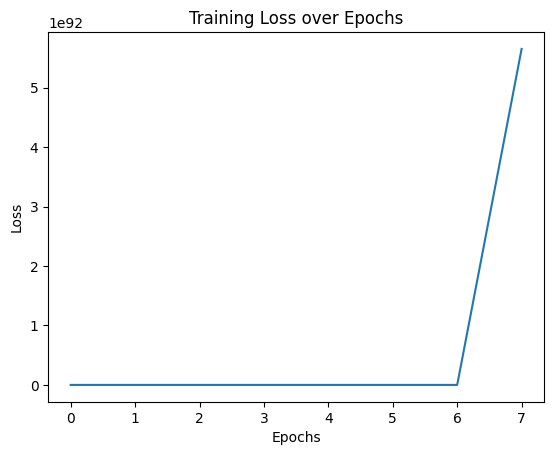

In [51]:
# Affichage des résultats
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

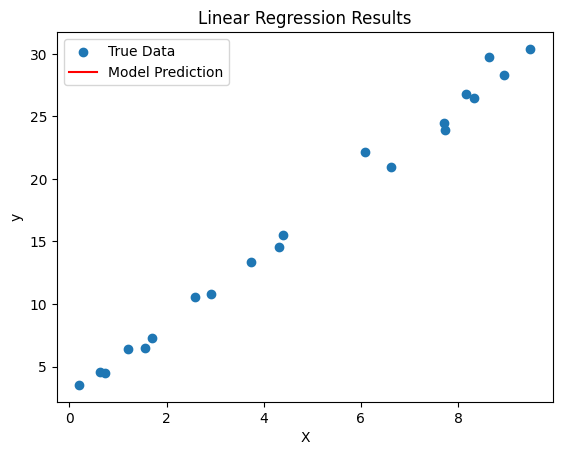

In [52]:
# Prédictions et visualisation
y_pred = net.forward(X_test)
plt.scatter(X_test, y_test, label='True Data')
plt.plot(X_test, y_pred, color='r', label='Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()